# Exercise Sheet 7

Willy Oesterheld (508791)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd


In [25]:
# pdf
def osc_prop(energy, cos_theta, sin2theta=0.9, dm2=2.4e-3):
    l = 12e3 * cos_theta # base line - max corresponds to diameter of the Earth 12e3 km
    return 1-sin2theta * np.sin(1.27*dm2*l/energy)

# code to generate sample data taken from example notebook

def atmo_event_rate(energy, cos_theta, sin2theta=0.9, dm2=2.4e-3):
    flux = 1e5*energy**-1.7 # the true neutrino flux is steeper, this takes into account 
                            # neutrino cross-section, which is proportional to E
                            # as well as that we are working with logarithmic energy bins    
    # two flavor oscillation propability for muon disappearance - see wikipedia 
    return flux*osc_prop(energy, cos_theta, sin2theta, dm2)

def run_experiment(energy, cosdec, sin2theta=0.9, dm2=2.4e-3):
    x = np.array(energy.size)
    events=np.zeros(energy.size*cosdec.size)
    i = 0
    for e in energy:
        for c in cosdec:
            mu = atmo_event_rate(e,c,sin2theta,dm2)
            sig = np.sqrt(mu)
            event_random = np.random.normal(mu,sig)
            events[i] = int(event_random)
            i=i+1             
    return events

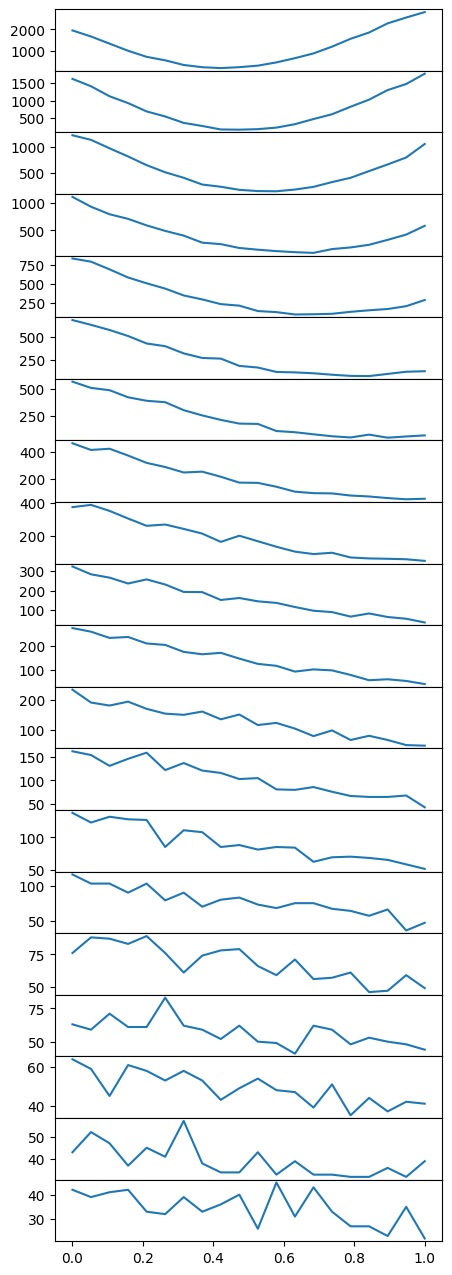

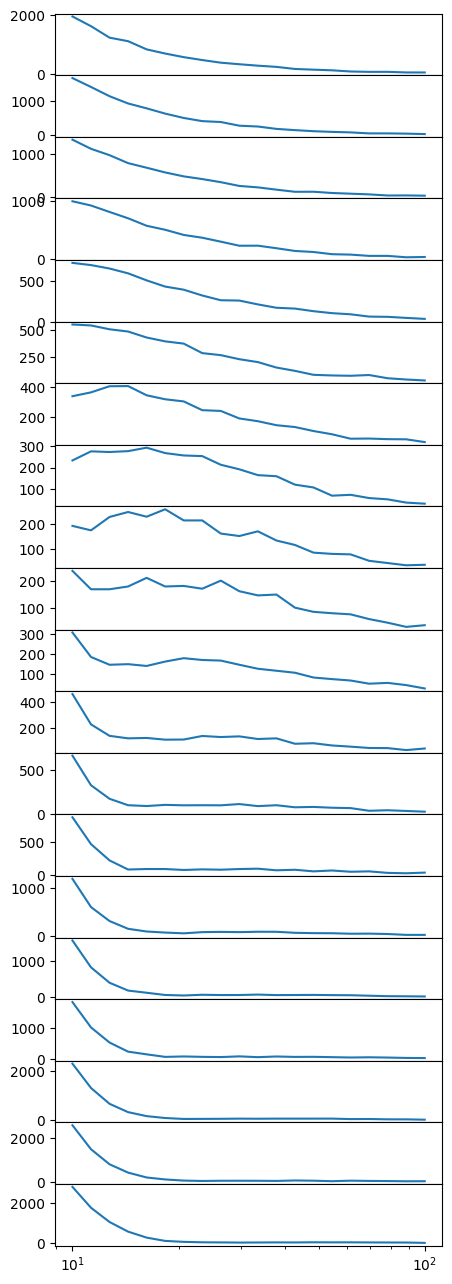

In [31]:
N = 20

# lets generate one experiment, with 10 energy bins and 10 cos(declination) bins
cosdec =  np.linspace(0, 1, N) # 10 steps in cos(declination) from 0 to 1 
log10_energy = np.linspace(1, 2, N) # 10 steps in log10(energy) from 10 to 100 GeV
energy=10**log10_energy

# run the experiment 
events=run_experiment(energy,cosdec)

# plot events over angle for each energy
i = 0
fig, ax = plt.subplots(nrows=N, ncols=1, figsize=(5,N*8/10), sharex=True)
fig.subplots_adjust(hspace=0)
for e in energy:
    x = cosdec
    y = events[(N*i):(N*(i+1))]
    ax[i].plot(x, y, label=f"{e}")
    i += 1

# plot events over energy for each angle
i = 0
fig, ax = plt.subplots(nrows=N, ncols=1, figsize=(5,N*8/10), sharex=True)
fig.subplots_adjust(hspace=0)
for e in energy:
    x = energy
    y = events[i::N]
    ax[i].plot(x, y, label=f"{e}")
    ax[i].semilogx(base=10)
    i += 1


In [27]:
X = [(e,c) for e in energy for c in cosdec]

def likelyhood(params, X):
    sin2theta, dm2 = params
    y = np.array([osc_prop(energy=x[0], cos_theta=x[1], sin2theta=sin2theta, dm2=dm2) for x in X])
    return -np.sum(np.log(y))

fit = sp.optimize.minimize(likelyhood, x0=(0.5, 2e-3), args=X, method='Nelder-Mead')
print(fit)


 final_simplex: (array([[-6.48307127e+22,  1.66105372e-03],
       [-5.08774923e+22,  1.12529307e-03],
       [-2.81197771e+22,  1.98429391e-03]]), array([-4627.05982244, -4576.24859067, -4561.46795689]))
           fun: -4627.059822438925
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 400
           nit: 214
        status: 1
       success: False
             x: array([-6.48307127e+22,  1.66105372e-03])


/var/folders/df/pbkmztx179xg_j7zyzjnd8480000gn/T/ipykernel_16644/2446928375.py:6: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(y))
